In [1]:
from PIL import Image
import IPython.display as display

drive = "QKDResources/"

img1 = Image.open(drive + "images/09/nanomod27-fig1.png")
img2 = Image.open(drive + "images/09/nanomod27-teleportIBMCompOvrvw.png")
img3 = Image.open(drive + "images/09/nanomod27-resultXHrun.png")
img4 = Image.open(drive + "images/09/nanomod27-TeleportHRun.png")
img5 = Image.open(drive + "images/09/nanomod27-TeleportBasicRun.png")
img6 = Image.open(drive + "images/09/nanomod28-BB84-withoutEve.png")
img7 = Image.open(drive + "images/09/nanomod28-eprQKD20bits.png")
img8 = Image.open(drive + "images/09/nanomod28-3stageQKD.png")

# 09 Quantum Computing Simulation

## Lesson Goals

1. Students will apply quantum operations and use quantum entanglement to perform teleportation of arbitrary qubits.
2. Students will experiment with IBM quantum computing interface and simulator.
3. Students will build complex quantum circuits and perform actual measurements.
4. Students will apply quantum operations and use quantum entanglement to simulate quantum key distribution on IBM quantum computer interface.
5. Students will experiment with IBM quantum computing interface and simulator.
6. Students will build complex quantum circuits, perform measurements and interpret the outputs.

## 09.01: IBM Quantum Computers & Simulating Quantum Teleportation

Quantum teleportation is perhaps the most exciting application of quantum mechanics. Immediately images of Star Trek "beam" into one's mind upon hearing teleportation. While it won’t be as dramatic as Star Trek, if actually implemented for larger objects it would be pretty close to one seen on the big screen. 

Quantum Teleportation, essentially allows the teleportation of an arbitrary qubit to another location with the help of a pre-shared entangled pair and transmission of two classical bits.

Since the transmission of classical bits is necessary to recreate the qubit at the receivers end, teleportation does not violate the assumption that nothing can travel faster than the speed of light.

While quantum teleportation of small quantum objects has already been performed in laboratories, it is unclear if it will scale or if conscious entities can be teleported. Therefore, we may be a ways from “zooming” past traffic jams.

Back to reality, let’s study a circuit for quantum teleportation. You will note as we describe the teleportation mechanism that we are not copying an arbitrary qubit (prohibited by the no-cloning theorem) but moving it from one location to another, therefore the original qubit will be destroyed in the process. 

### 09.01.02: The Teleportation circuit

Recall our two favorite bases $\{\rvert 0 \rangle, \rvert 1 \rangle \}$ and $\big\{ \frac{\rvert 0 \rangle + \rvert 1 \rangle}{\sqrt{2}},\frac{\rvert 0 \rangle - \rvert 1 \rangle}{\sqrt{2}}\big \}$. The circuit used for quantum teleportation is below:

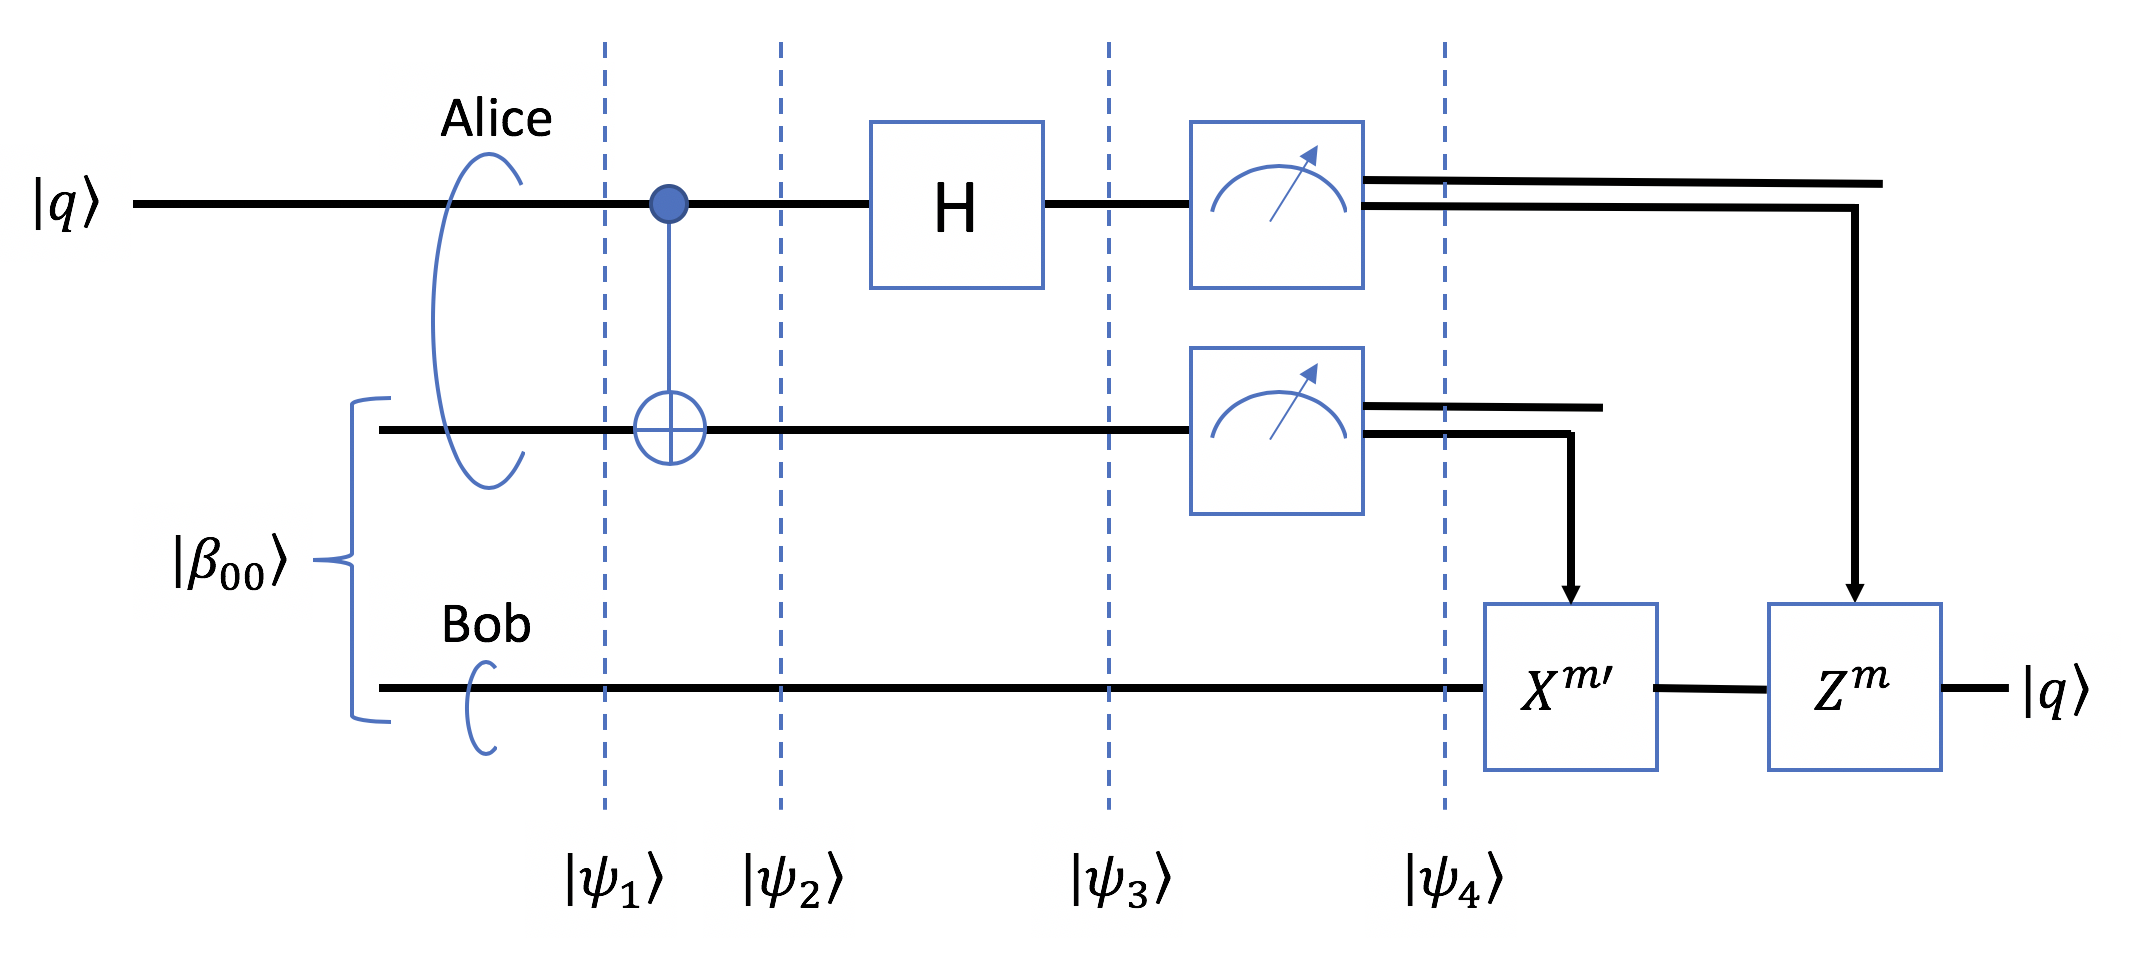

In [2]:
display.display(img1)

$\rvert\beta_{00}\rangle$ represents an entangled pair of qubits $\frac{\rvert 00 \rangle + \rvert 11 \rangle}{\sqrt{2}}$

The first qubit of the entangled pair is with Alice and the second qubit is with Bob.

Alice’s input qubit is denoted by $\rvert q \rangle$.

We can compute the state of the system at various points in the circuit as $\rvert \psi_1 \rangle$, $\rvert \psi_2 \rangle$, $\rvert \psi_3 \rangle$ and so on.

The system state at $\rvert \psi_1 \rangle$ is, therefore, given by:

\begin{aligned}
\rvert \psi_1 \rangle &= \rvert q \rangle \otimes \rvert \beta_{00} \rangle \\
&= ( \alpha \rvert 0 \rangle + \beta \rvert 1 \rangle ) \otimes \big ( \frac{\rvert 00 \rangle + \rvert 11 \rangle}{\sqrt{2}}\big) \\
&= \frac{1}{\sqrt{2}} ( \alpha \rvert 000 \rangle + \alpha \rvert 011 \rangle + \beta \rvert 100 \rangle + \beta \rvert 111 \rangle ) \\
\end{aligned}


The first operation that Alice applies is a CNOT between $\rvert q \rangle$ and her qubit from $\rvert \beta_{00} \rangle$ acts as the controlled qubit.

Therefore $\rvert \psi_2 \rangle$ can be computed by noting the effect of CNOT which is given by:

$$\rvert x,y,z \rangle \rightarrow \rvert x,x\oplus y,z \rangle$$

$$\rvert \psi_1 \rangle \rightarrow \rvert \psi_2 \rangle = \frac{1}{\sqrt{2}} ( \alpha \rvert 000 \rangle + \alpha \rvert 011 \rangle + \beta \rvert 110 \rangle + \beta \rvert 101 \rangle )$$




Now Alice applies a Hadamard gate on the top qubit. Hadamard has the following mappings:

$$\rvert 0 \rangle \rightarrow \frac{\rvert 0 \rangle + \rvert 1 \rangle}{\sqrt{2}}$$
$$\rvert 1 \rangle \rightarrow \frac{\rvert 0 \rangle - \rvert 1 \rangle}{\sqrt{2}}$$

Therefore, the terms in $\rvert \psi_2 \rangle$ will be mapped as follows:

$$\rvert \underline{0}00 \rangle \rightarrow \frac{1}{\sqrt{2}} ( \rvert \underline{0}00 \rangle + \rvert \underline{1}00 \rangle ) $$
$$\rvert \underline{0}11 \rangle \rightarrow \frac{1}{\sqrt{2}} ( \rvert \underline{0}11 \rangle + \rvert \underline{1}11 \rangle ) $$
$$\rvert \underline{1}10 \rangle \rightarrow \frac{1}{\sqrt{2}} ( \rvert \underline{0}10 \rangle - \rvert \underline{1}10 \rangle ) $$
$$\rvert \underline{1}01 \rangle \rightarrow \frac{1}{\sqrt{2}} ( \rvert \underline{0}01 \rangle - \rvert \underline{1}01 \rangle ) $$



Hence, we have:

$$\rvert \psi_3 \rangle = \frac{1}{\sqrt{2}}\big[\alpha \rvert 000 \rangle + \alpha \rvert 100 \rangle + \alpha \rvert 001 \rangle + \alpha \rvert 111 \rangle + \beta \rvert 010 \rangle - \beta \rvert 110 \rangle + \beta \rvert 001 \rangle - \beta \rvert 101 \rangle \big]$$

Collecting terms:

$$\rvert \psi_3 \rangle = \rvert 00 \rangle \Big(\frac{\alpha \rvert 0 \rangle + \beta \rvert 1 \rangle}{\sqrt{2}}\Big) + 
\rvert 01 \rangle \Big(\frac{\alpha \rvert 1 \rangle + \beta \rvert 0 \rangle}{\sqrt{2}} \Big)+ \rvert 10 \rangle \Big(\frac{\alpha \rvert 0 \rangle - \beta \rvert 1 \rangle}{\sqrt{2}} \Big)+ \rvert 11 \rangle \Big(\frac{\alpha \rvert 1 \rangle - \beta \rvert 0 \rangle}{\sqrt{2}} \Big)$$




In $\rvert \psi_3 \rangle$ the first two qubits are controlled by Alice. She will measure them in the standard basis. The resulting possible outputs are given in the following table. We denote Alice’s measurement outcomes as $m$ and $m’$ for the two qubits under her control.


| **Alice's measurement outcomes** |**Bob's qubit** |**Gates applied by Bob**|
|:---|:--:|:--:|
| **m, m'** | ||
| 0, 0| $\alpha\rvert0\rangle+\beta\rvert1\rangle$|I|
| 0, 1| $\alpha\rvert1\rangle+\beta\rvert0\rangle$|Z|
| 1, 0| $\alpha\rvert0\rangle-\beta\rvert1\rangle$|X|
| 1, 1| $\alpha\rvert1\rangle-\beta\rvert0\rangle$|XZ|


We have written the gate operations in short as $X^{m'}Z^m$ 

Where $X^0=Z^0=I$ and so on. 

When Alice transmits the values of $m$, $m’$ to Bob. Bob will apply the $X$ and $Z$ gates accordingly are retrieve the original qubit $\rvert q \rangle = \alpha \rvert 0 \rangle + \beta \rvert 1 \rangle$.

### 09.01.03: Simulating Teleportation on IBM Quantum Computer

IBM provides a graphical interface to their quantum processors. In this graphical interface, you will find some of the basic quantum gates to the right and a scratch pad for circuits on the left. IBM has different size quantum processors but most people have access to the 5-qubit processor. The image below shows the important parts of the interface.

**Figure 1. IBM quantum computer interface shown along with circuit for quantum teleportation.**

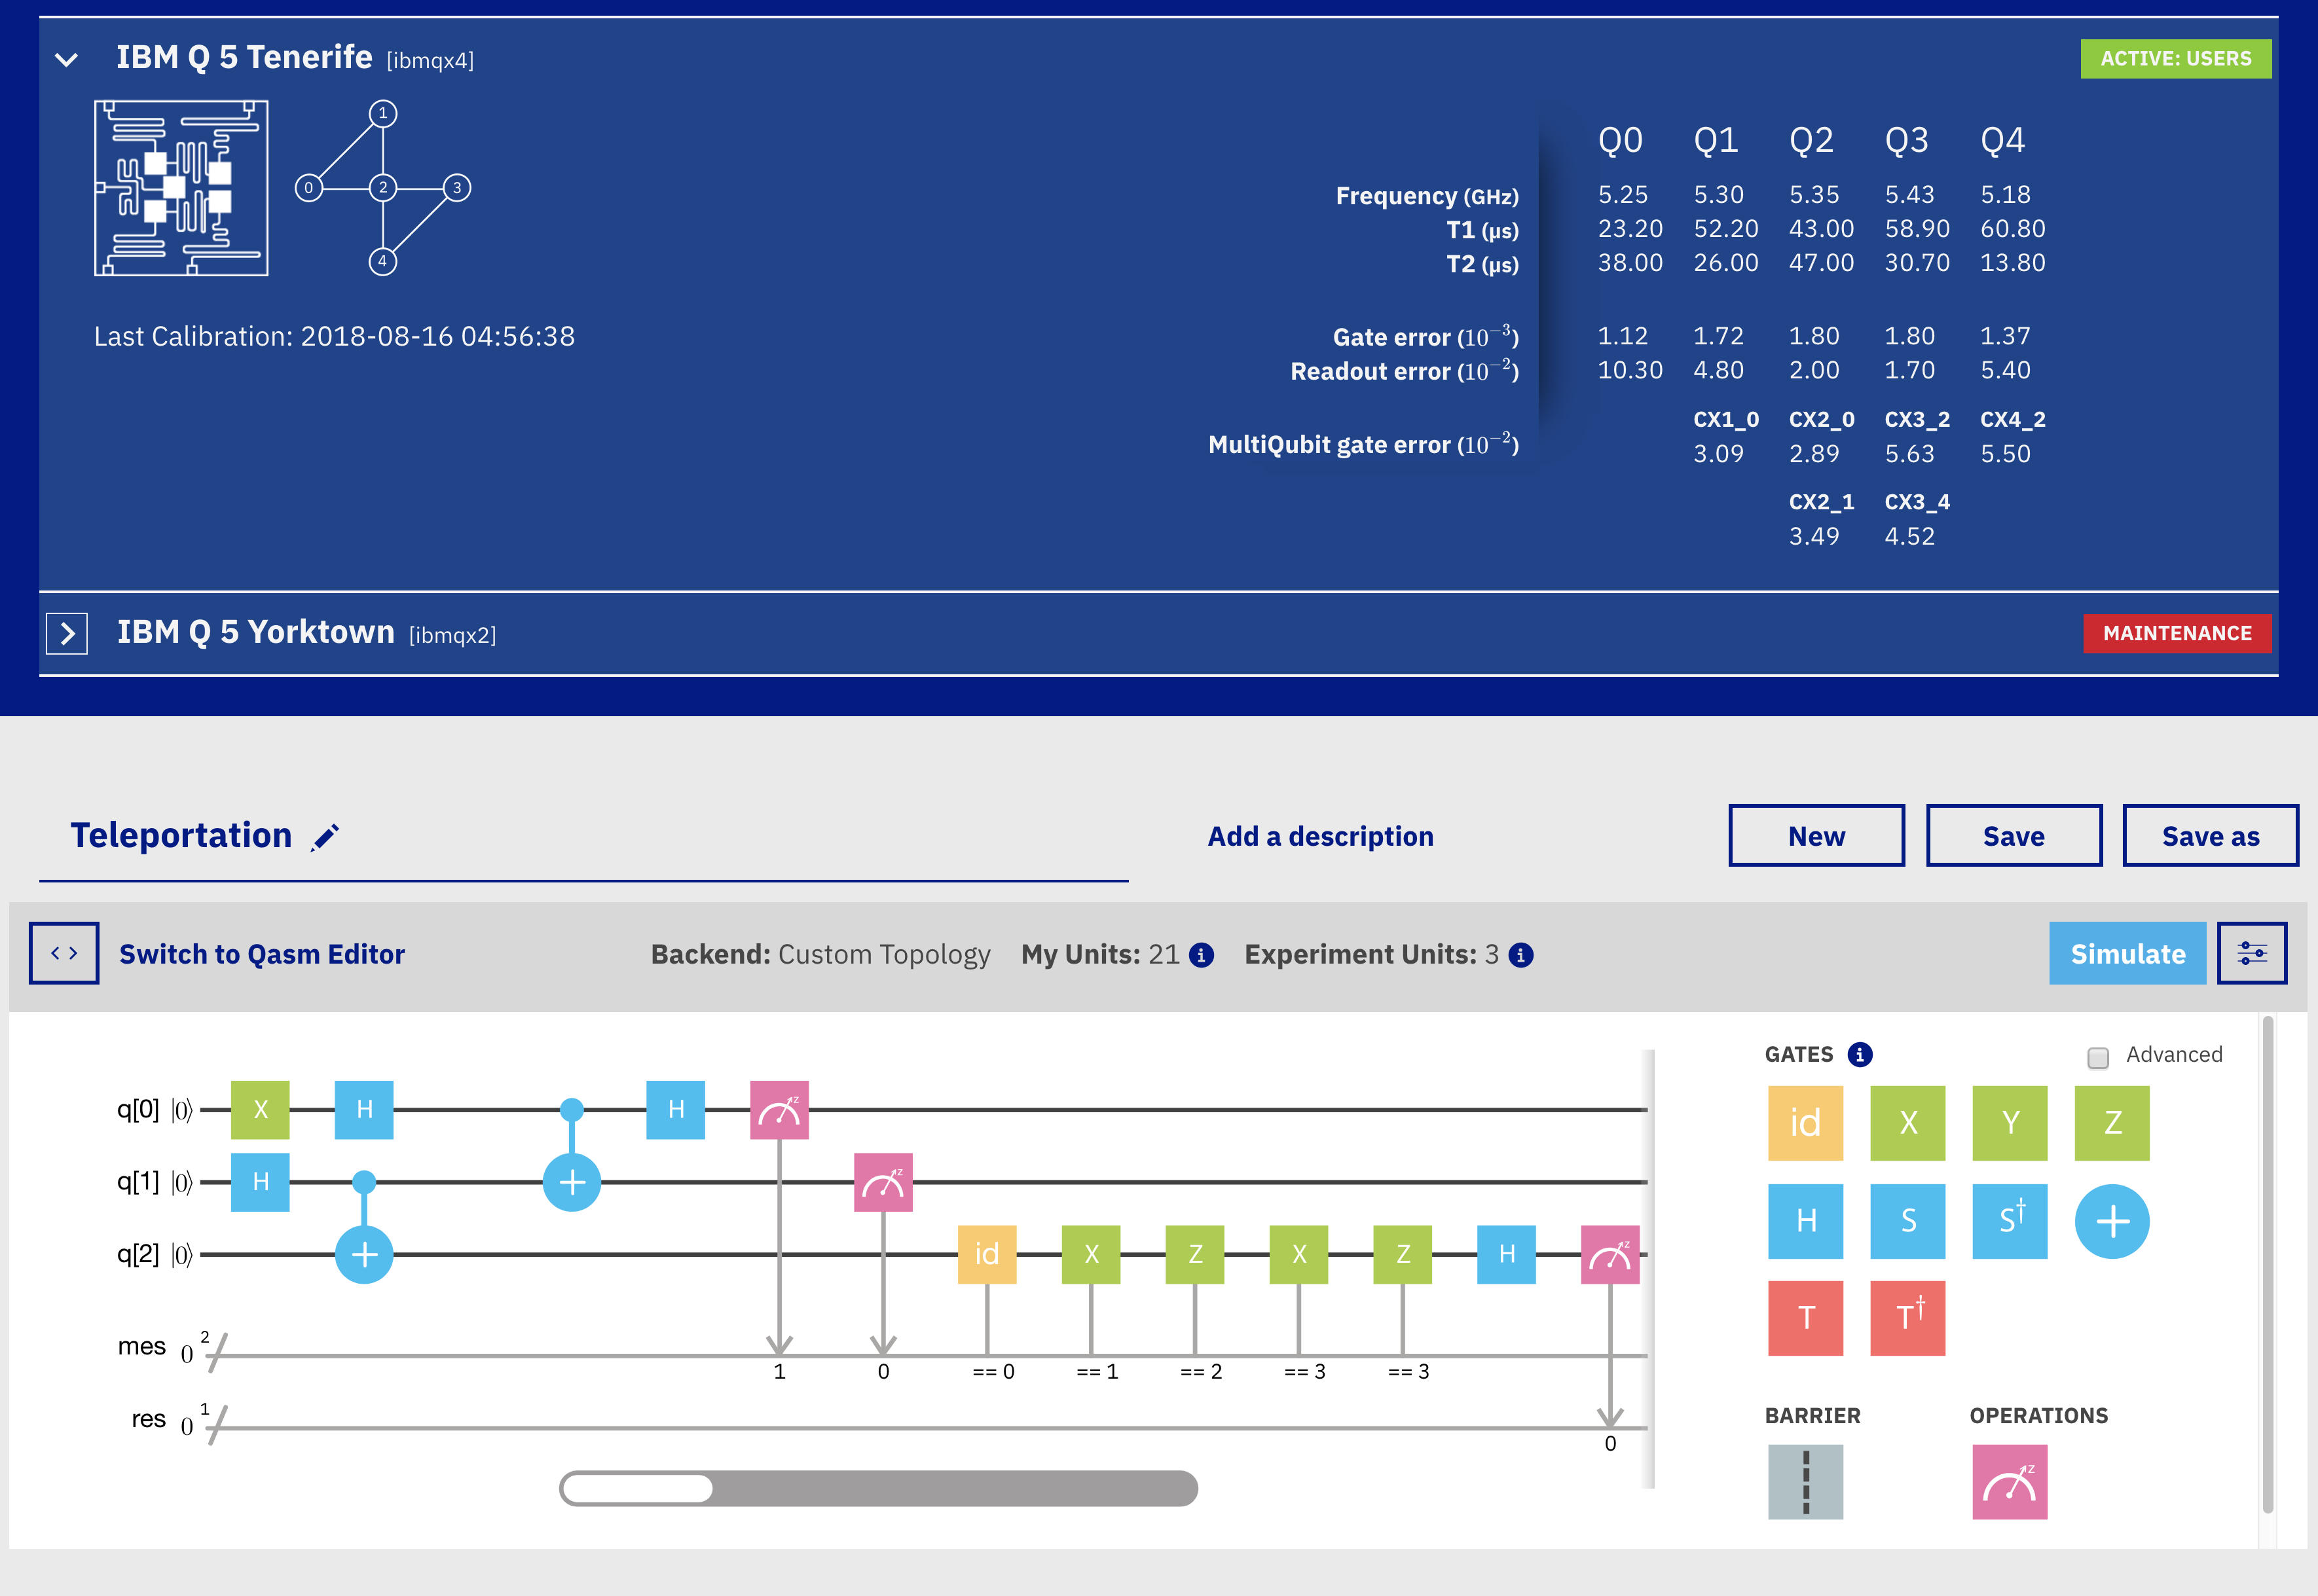

In [3]:
display.display(img2)

**Gates:** IBM provides access to $I, X, Y, Z, H, S$ and $T$ gates. The identity gate $I$ is shown as $id$. In addition there is a $CNOT$ gate and measurement operator that measures in the standard basis. One can drag and drop these gates to create circuits on the left. Each of the lines in the circuit is for a single qubit. The measurement operator writes its output to classical registers shown by a line with a forward slash on it at the bottom of the circuit. One can give different names to these classical registers a seen in the image above. The initial state of all the qubits is always set to $\rvert0\rangle$.

The above circuit shows the teleportation of $\frac{1}{\sqrt{2}}(\rvert0\rangle-\rvert1\rangle)$. Since we cannot "see" a qubit in superposition, we measure the qubit in the Hadamard basis and write its output to a classical register called "res". The 0 on the res line indicates the bit number of that particular measurement operation in that classical register which in general may contain many bits.

**Restrictions:** The physical layout of the qubits in IBM's quantum processor, unfortunately, does not allow arbitrary gate operations between all qubits. For example, the CNOT gate cannot be used on all the qubits. Although this is not a major issue it does complicate the circuit design quite a bit and in some cases requiring the use of more gates than necessary leading to higher probabilities of error. In our experiments we choose to use the simulator that IBM provides. Therefore, you see a Simulate button on the right above the gates. Upon pressing the simulate button it asks for number of shots meaning the number of times we wish to execute the circuit. Since, all the measurements are probabilistic it is helpful to see an average of all the possible outcomes over several trials. The image below shows the result of executing the above circuit for teleporting $\frac{1}{\sqrt{2}}(\rvert0\rangle-\rvert1\rangle)$.

**Figure 2. Results of executing the teleportation circuit for teleporting $\frac{1}{\sqrt{2}}(\rvert0\rangle-\rvert1\rangle)$.**

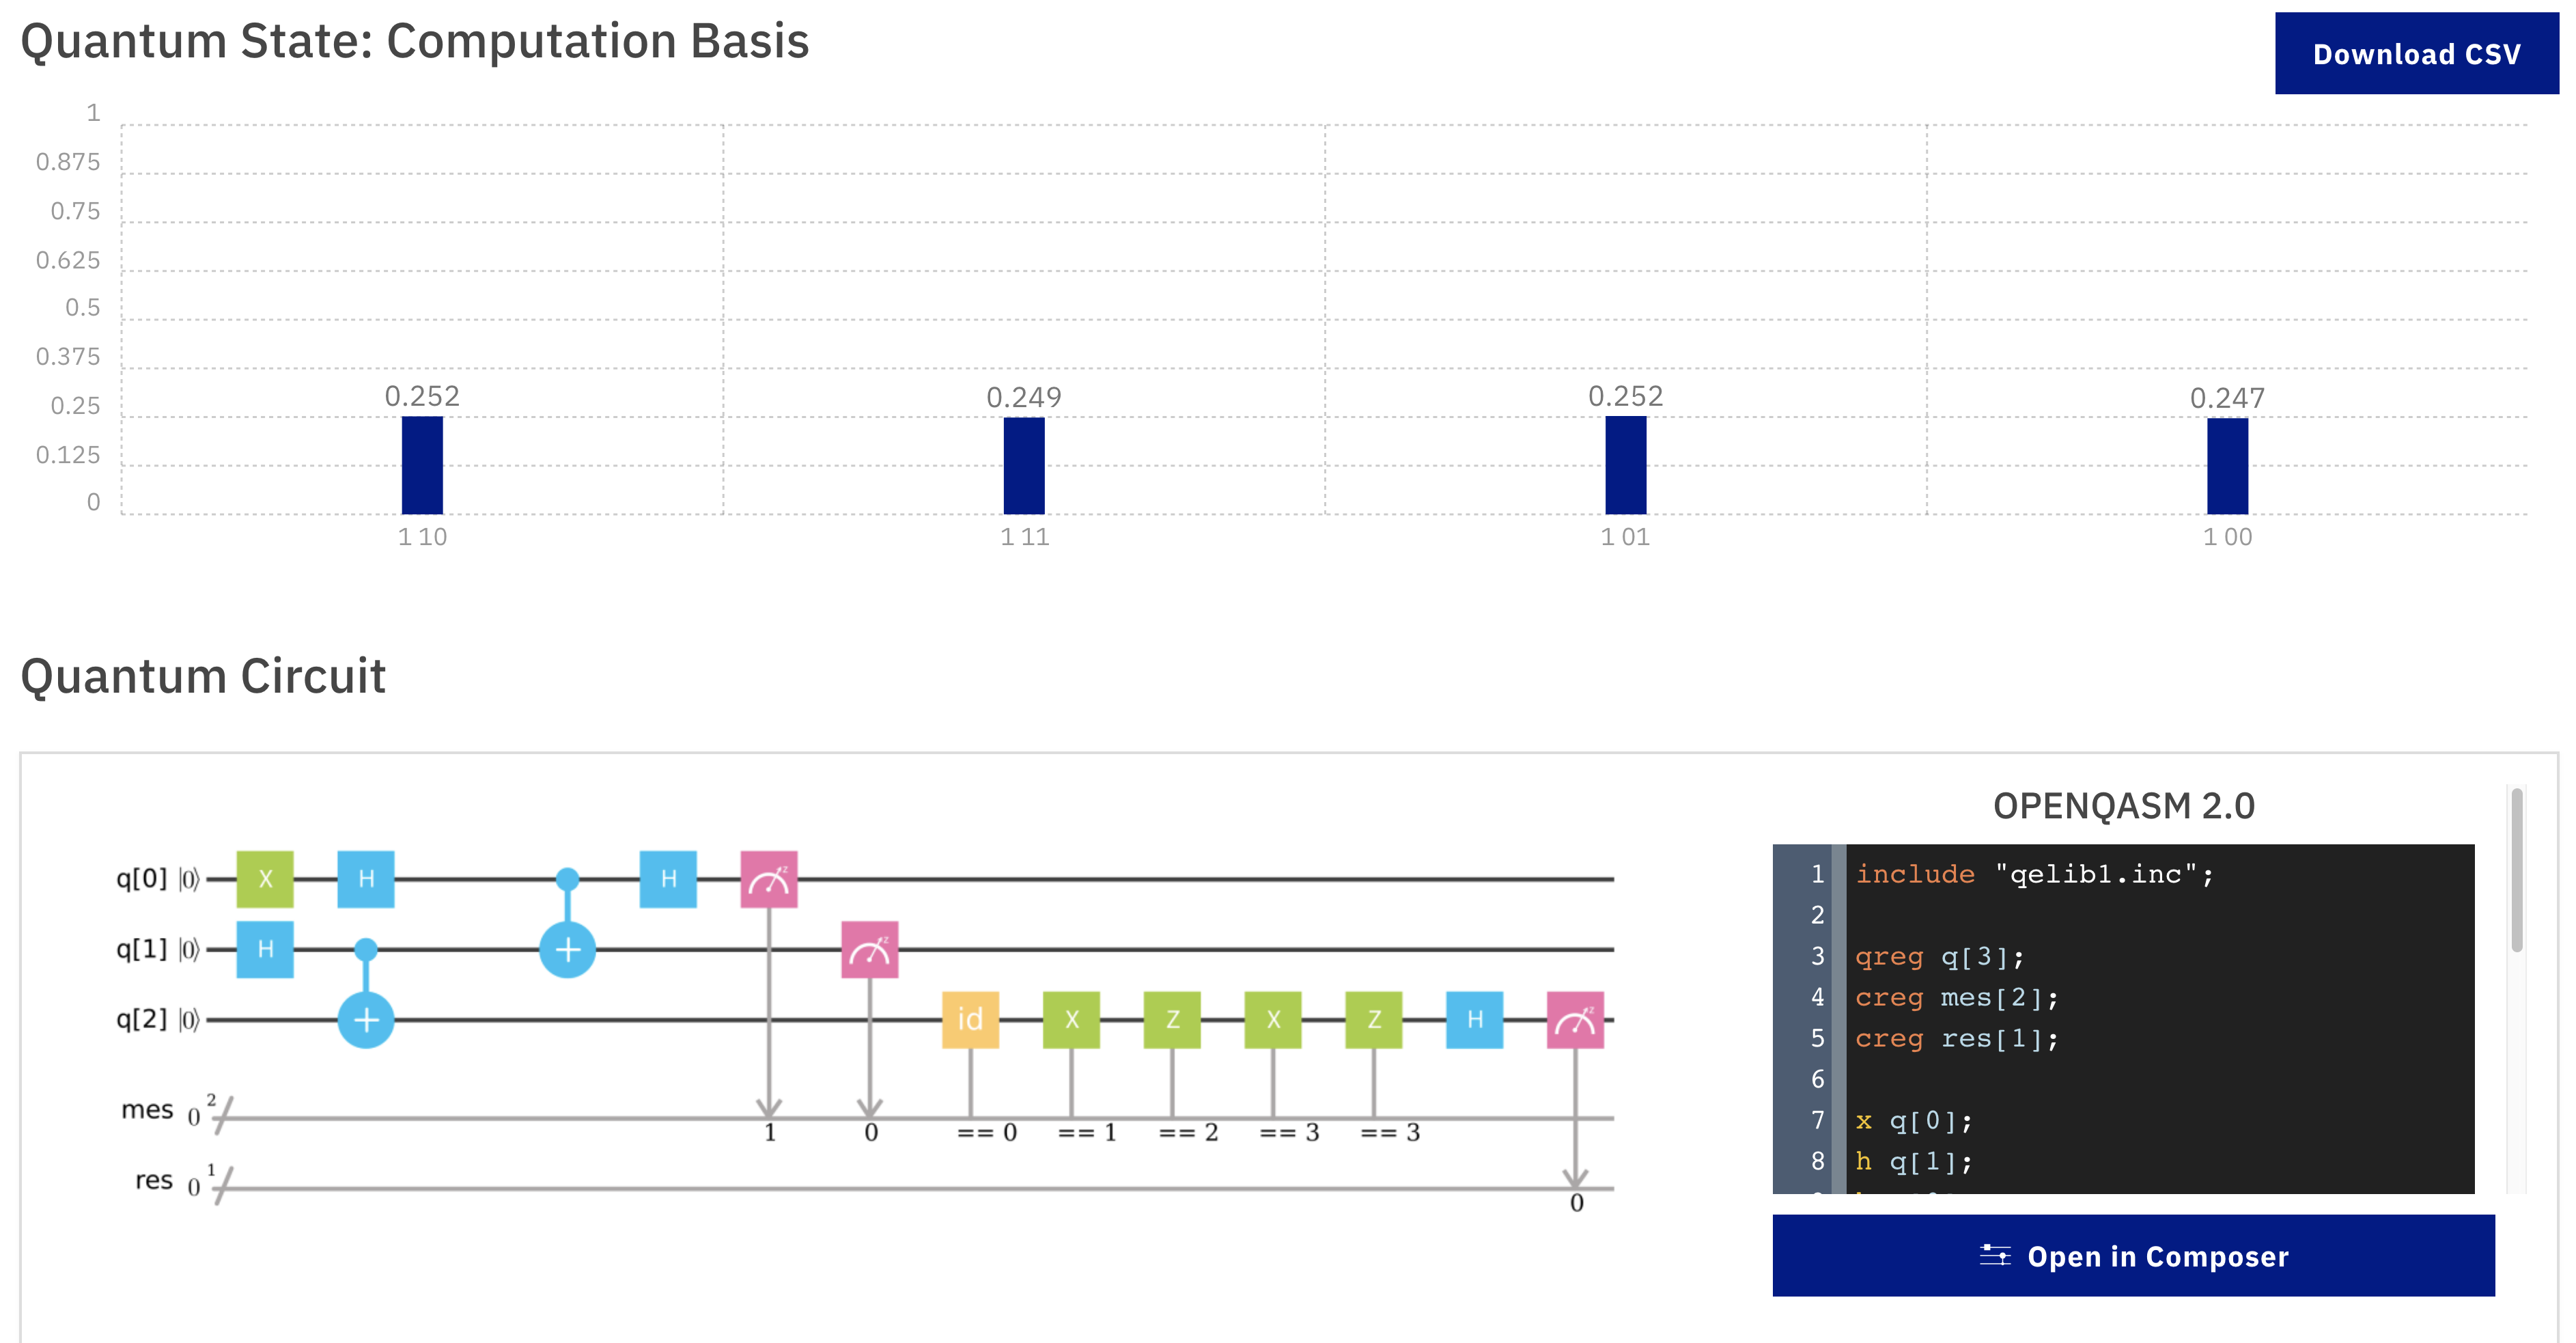

In [4]:
display.display(img3)

**Discussion**

The bar graph in the results shows the fraction of number of times a particular output was achieved. Further, notice the slight grouping of the bit under the bar. Since we are writing the output to two classical registers "mes" and "res" (for measurements and result), the output bit belonging to the same register are shown close together. Further, res only has one bit and mes has two bits; the bit in res is shown first and mes is shown after.

As we can see in the results, res is always set to 1. The bits in mes register however take on all the possible two bit values with equal probability. The 1 in res indicates that a $\frac{1}{\sqrt{2}}(\rvert0\rangle-\rvert1\rangle)$ was received. And all possible values of $m'$ and $m$ are equally likely therefore mes contains all possible outputs.

**QASM**

The graphical IBM circuit is translated into Open Quantum Assembly (OpenQASM) for execution. The blackbox on the right contains that code. It can be downloaded and saved and contains all the details for recreating the circuit.


#### Additional Examples

Figure 3 below shows the result of teleporting $\frac{1}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$ and figure 4 shows the result of teleporting $\rvert0\rangle$.

**Figure 3. Teleporting $\frac{1}{\sqrt{2}}(\rvert0\rangle+\rvert1\rangle)$ using the teleportation circuit.**

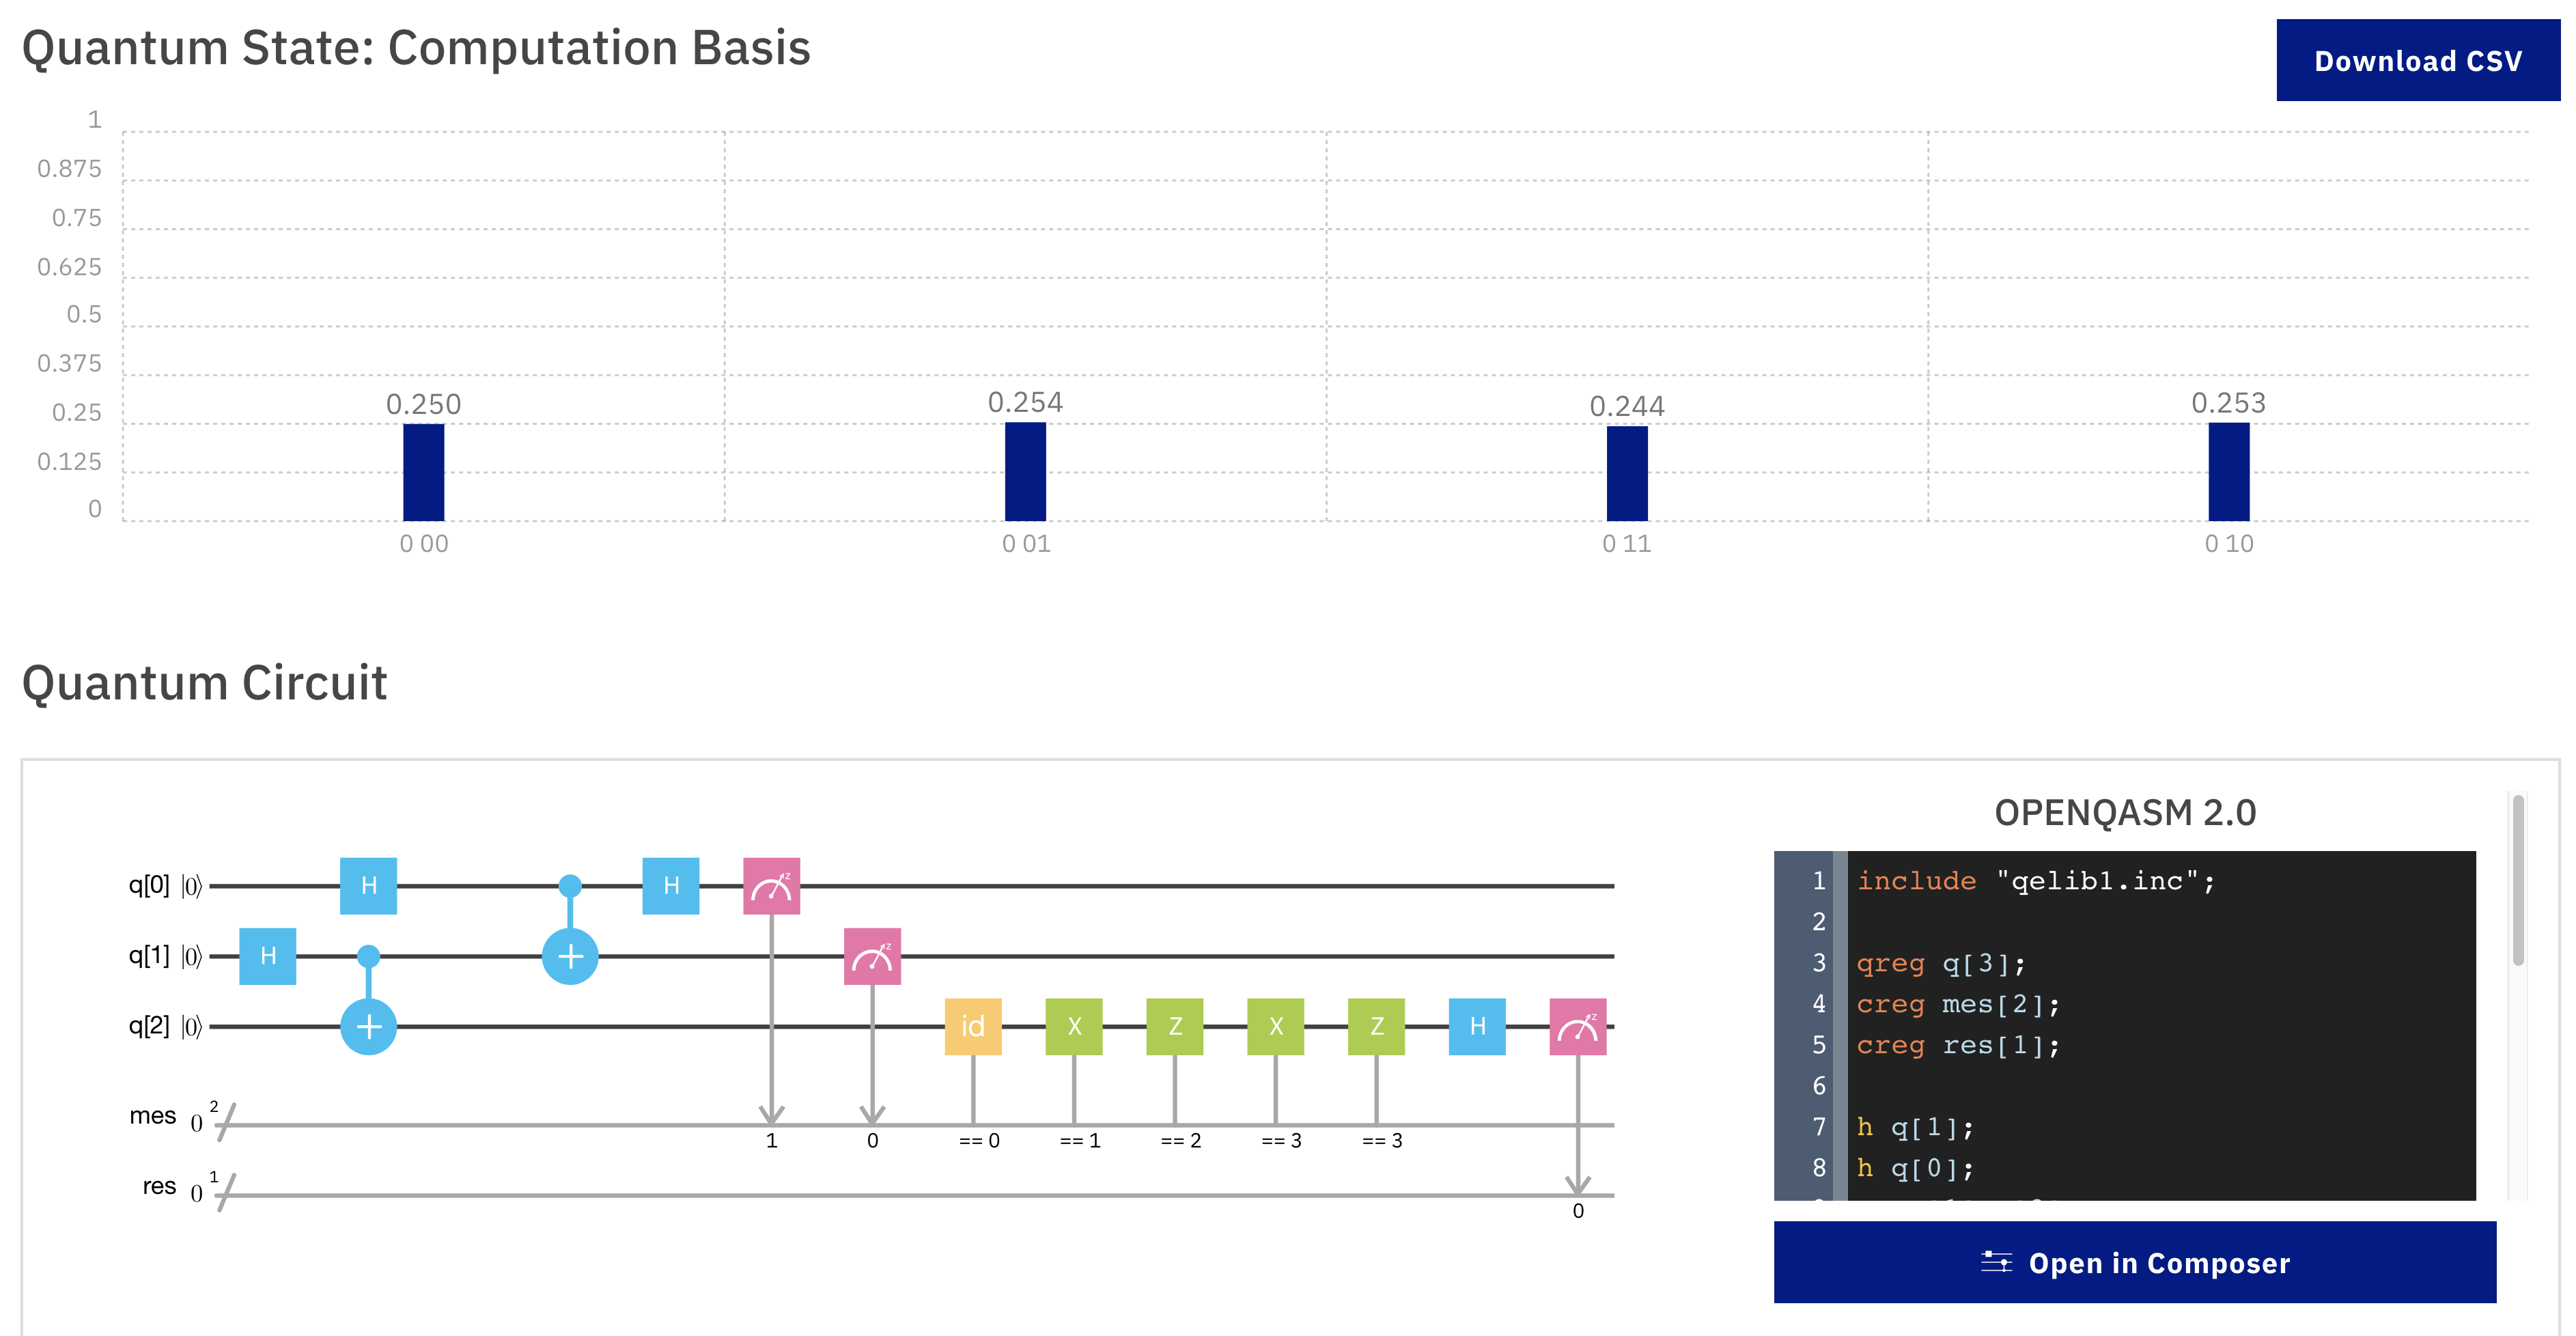

In [5]:
display.display(img4)

**Figure 4. Teleporting $\rvert0\rangle$ using the teleportation circuit.**

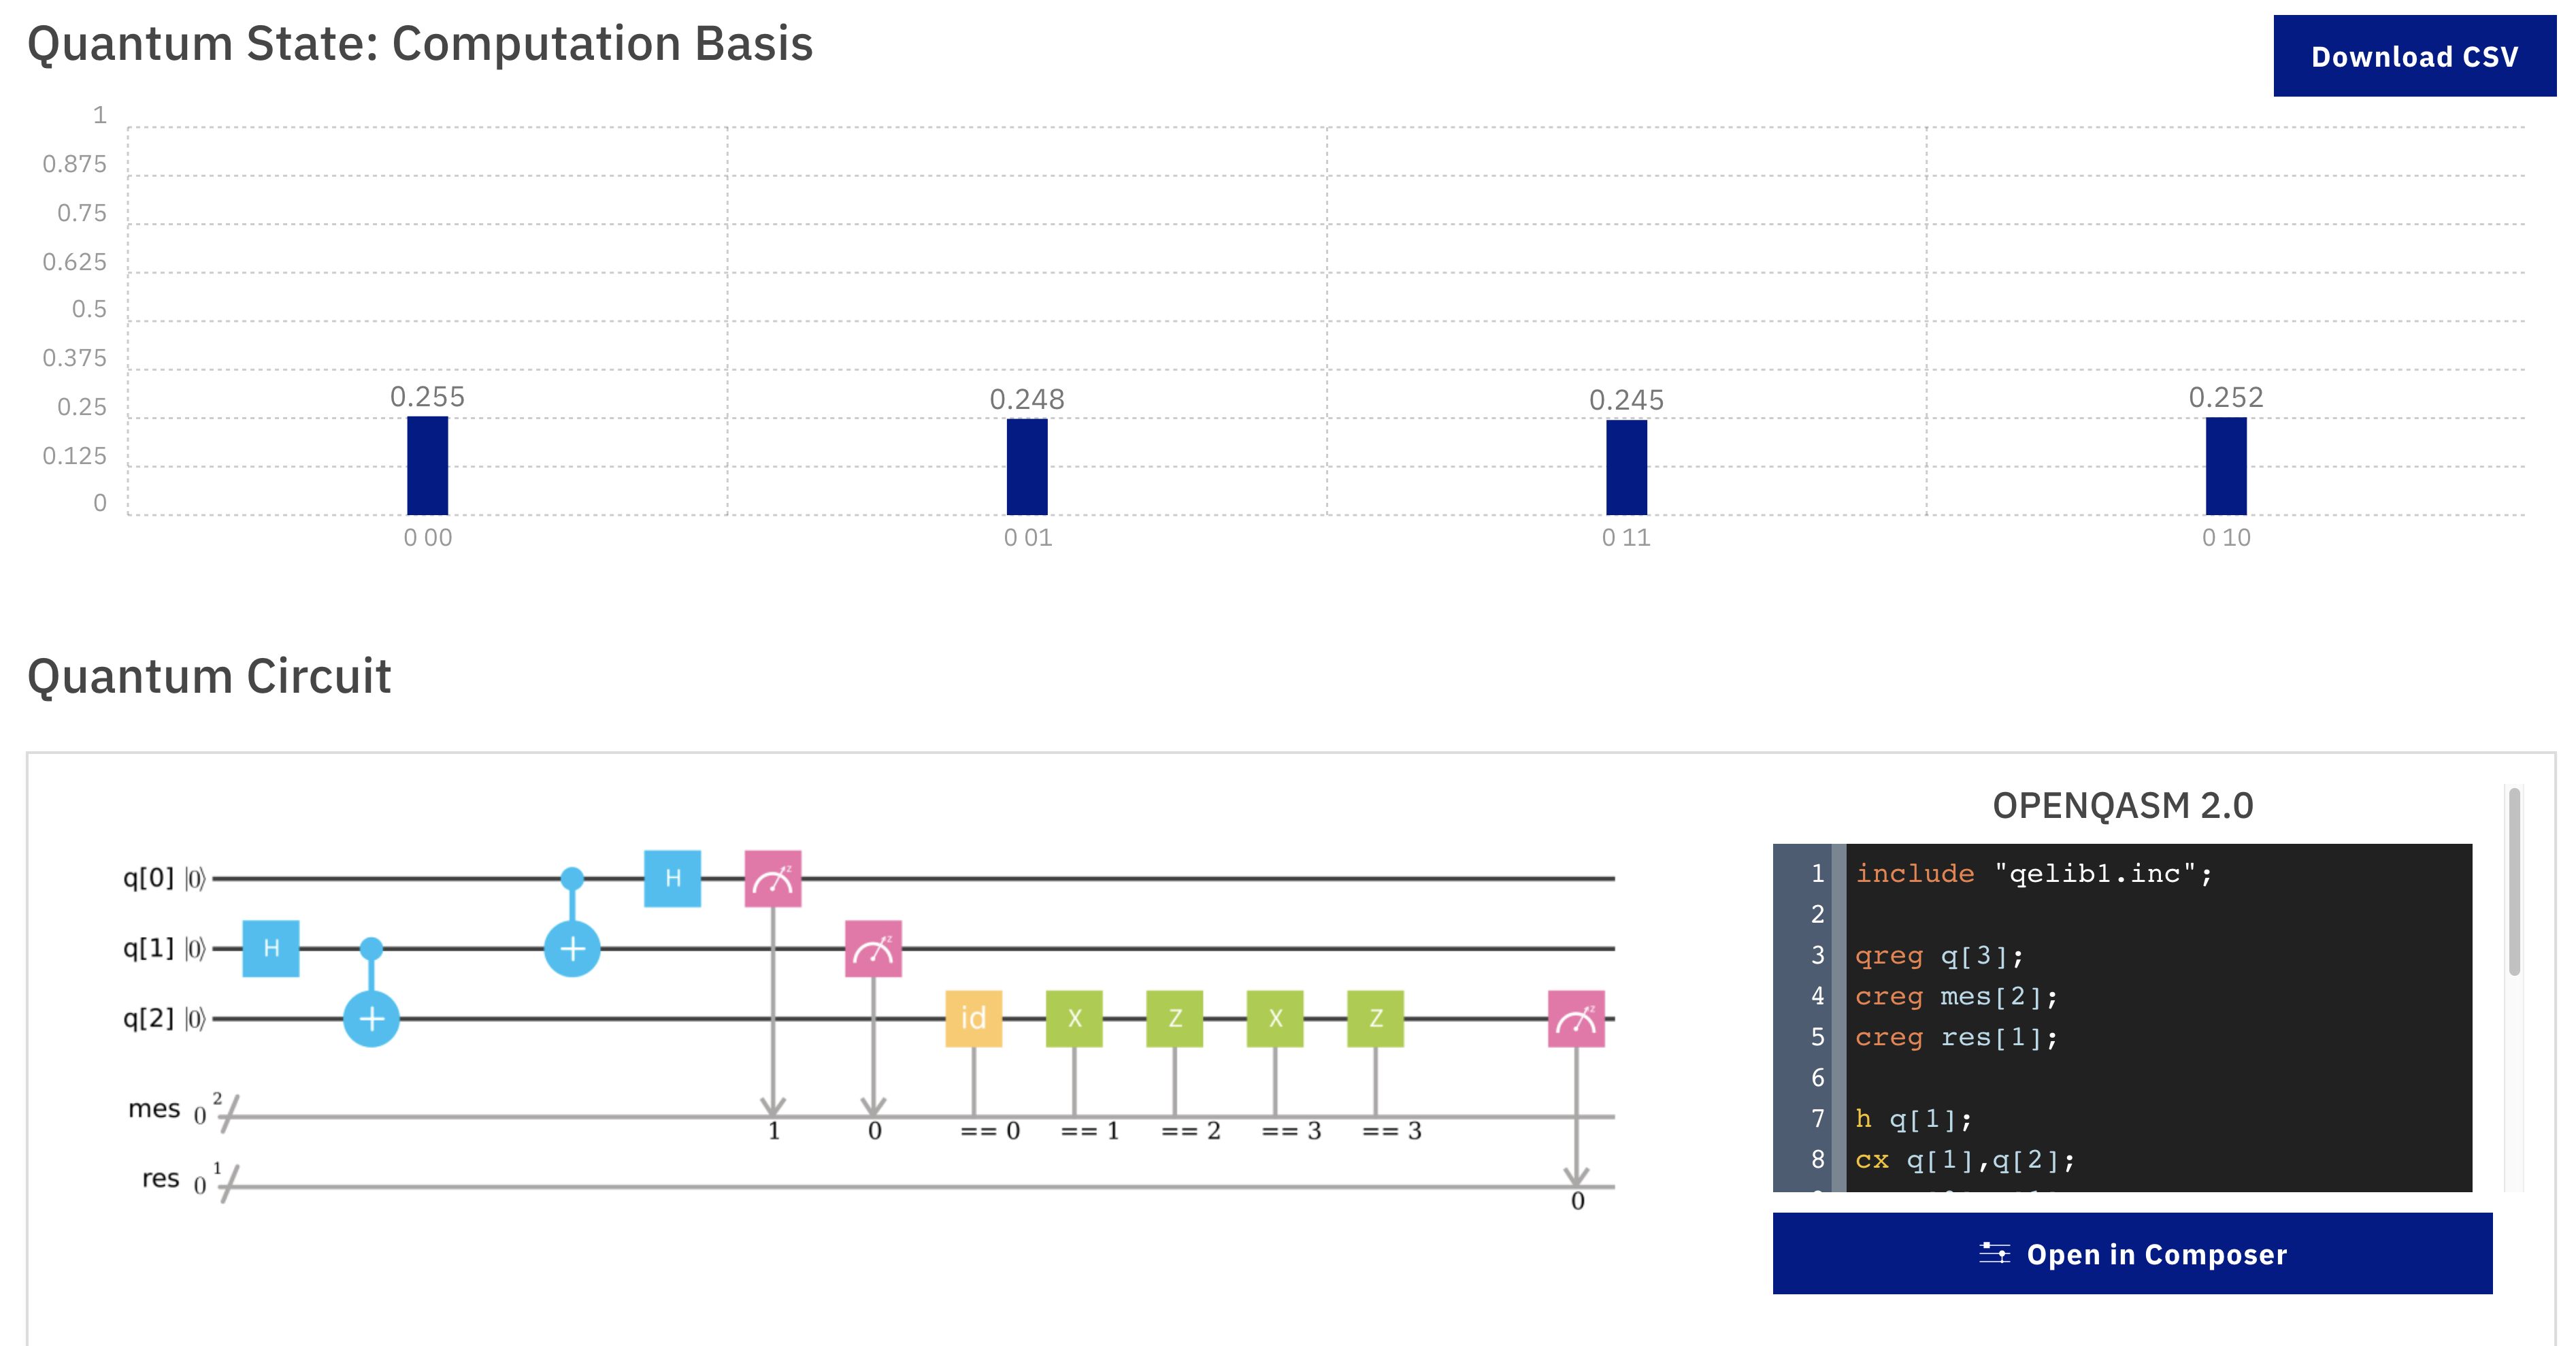

In [6]:
display.display(img5)

In the above circuits, we've assumed Alice to be on the left and Bob to the right. We don't have a way to implement actual networking so we envision in our mind's eye that the circuit wires between the gates serve as transmission lines between Alice and Bob. We will continue with such a set up with all our circuits.

## 09.02: Simulating BB84, EPR and Three-Stage QKD Protocols

### 09.02.01: Simulating BB84

As before, in order to simulate communication and QKD protocols we have to linearize the design and assume that Alice is on the left and Bob is on the right. The circuit lines in between them represent the transmission channel. Figure 1 below show the quantum circuit for BB84 with no Eve. Further, 10 quantum registers are shown that simulate the transmission of 10 qubits from Alice to Bob. All qubits are initialized to $\rvert0\rangle$ by default but since Alice wants to transmit random 1s and 0s in randomly chosen bases, we randomly apply the $X$ and $H$ gates to the qubits.

On Bob's end he randomly chooses a basis to measure each qubit. This is simulated by applying the Hadamard gate on random qubits. The default measurement operations is already in the standard basis, therefore nothing additional needs to be done to measure in the standard basis.

The bar graph shows the obtained results. The simulation was run a 100 times. There are only 16 outcomes because only some of the qubits exhibit a random collapse while the ones that were measured in a basis compatible with Alice's basis always collapse to the same value. Since the random collapse happens with a uniform probability every possible outcome happens roughly 6.4% of the time. The $x$-axis labels consists of the bit values in the classical register and are read from right to left. Therefore, bit number 0 in the classical register is written on the right.

**Figure 1. Simulation of BB84 without Eve. Measurement results are shown along with the circuit.**

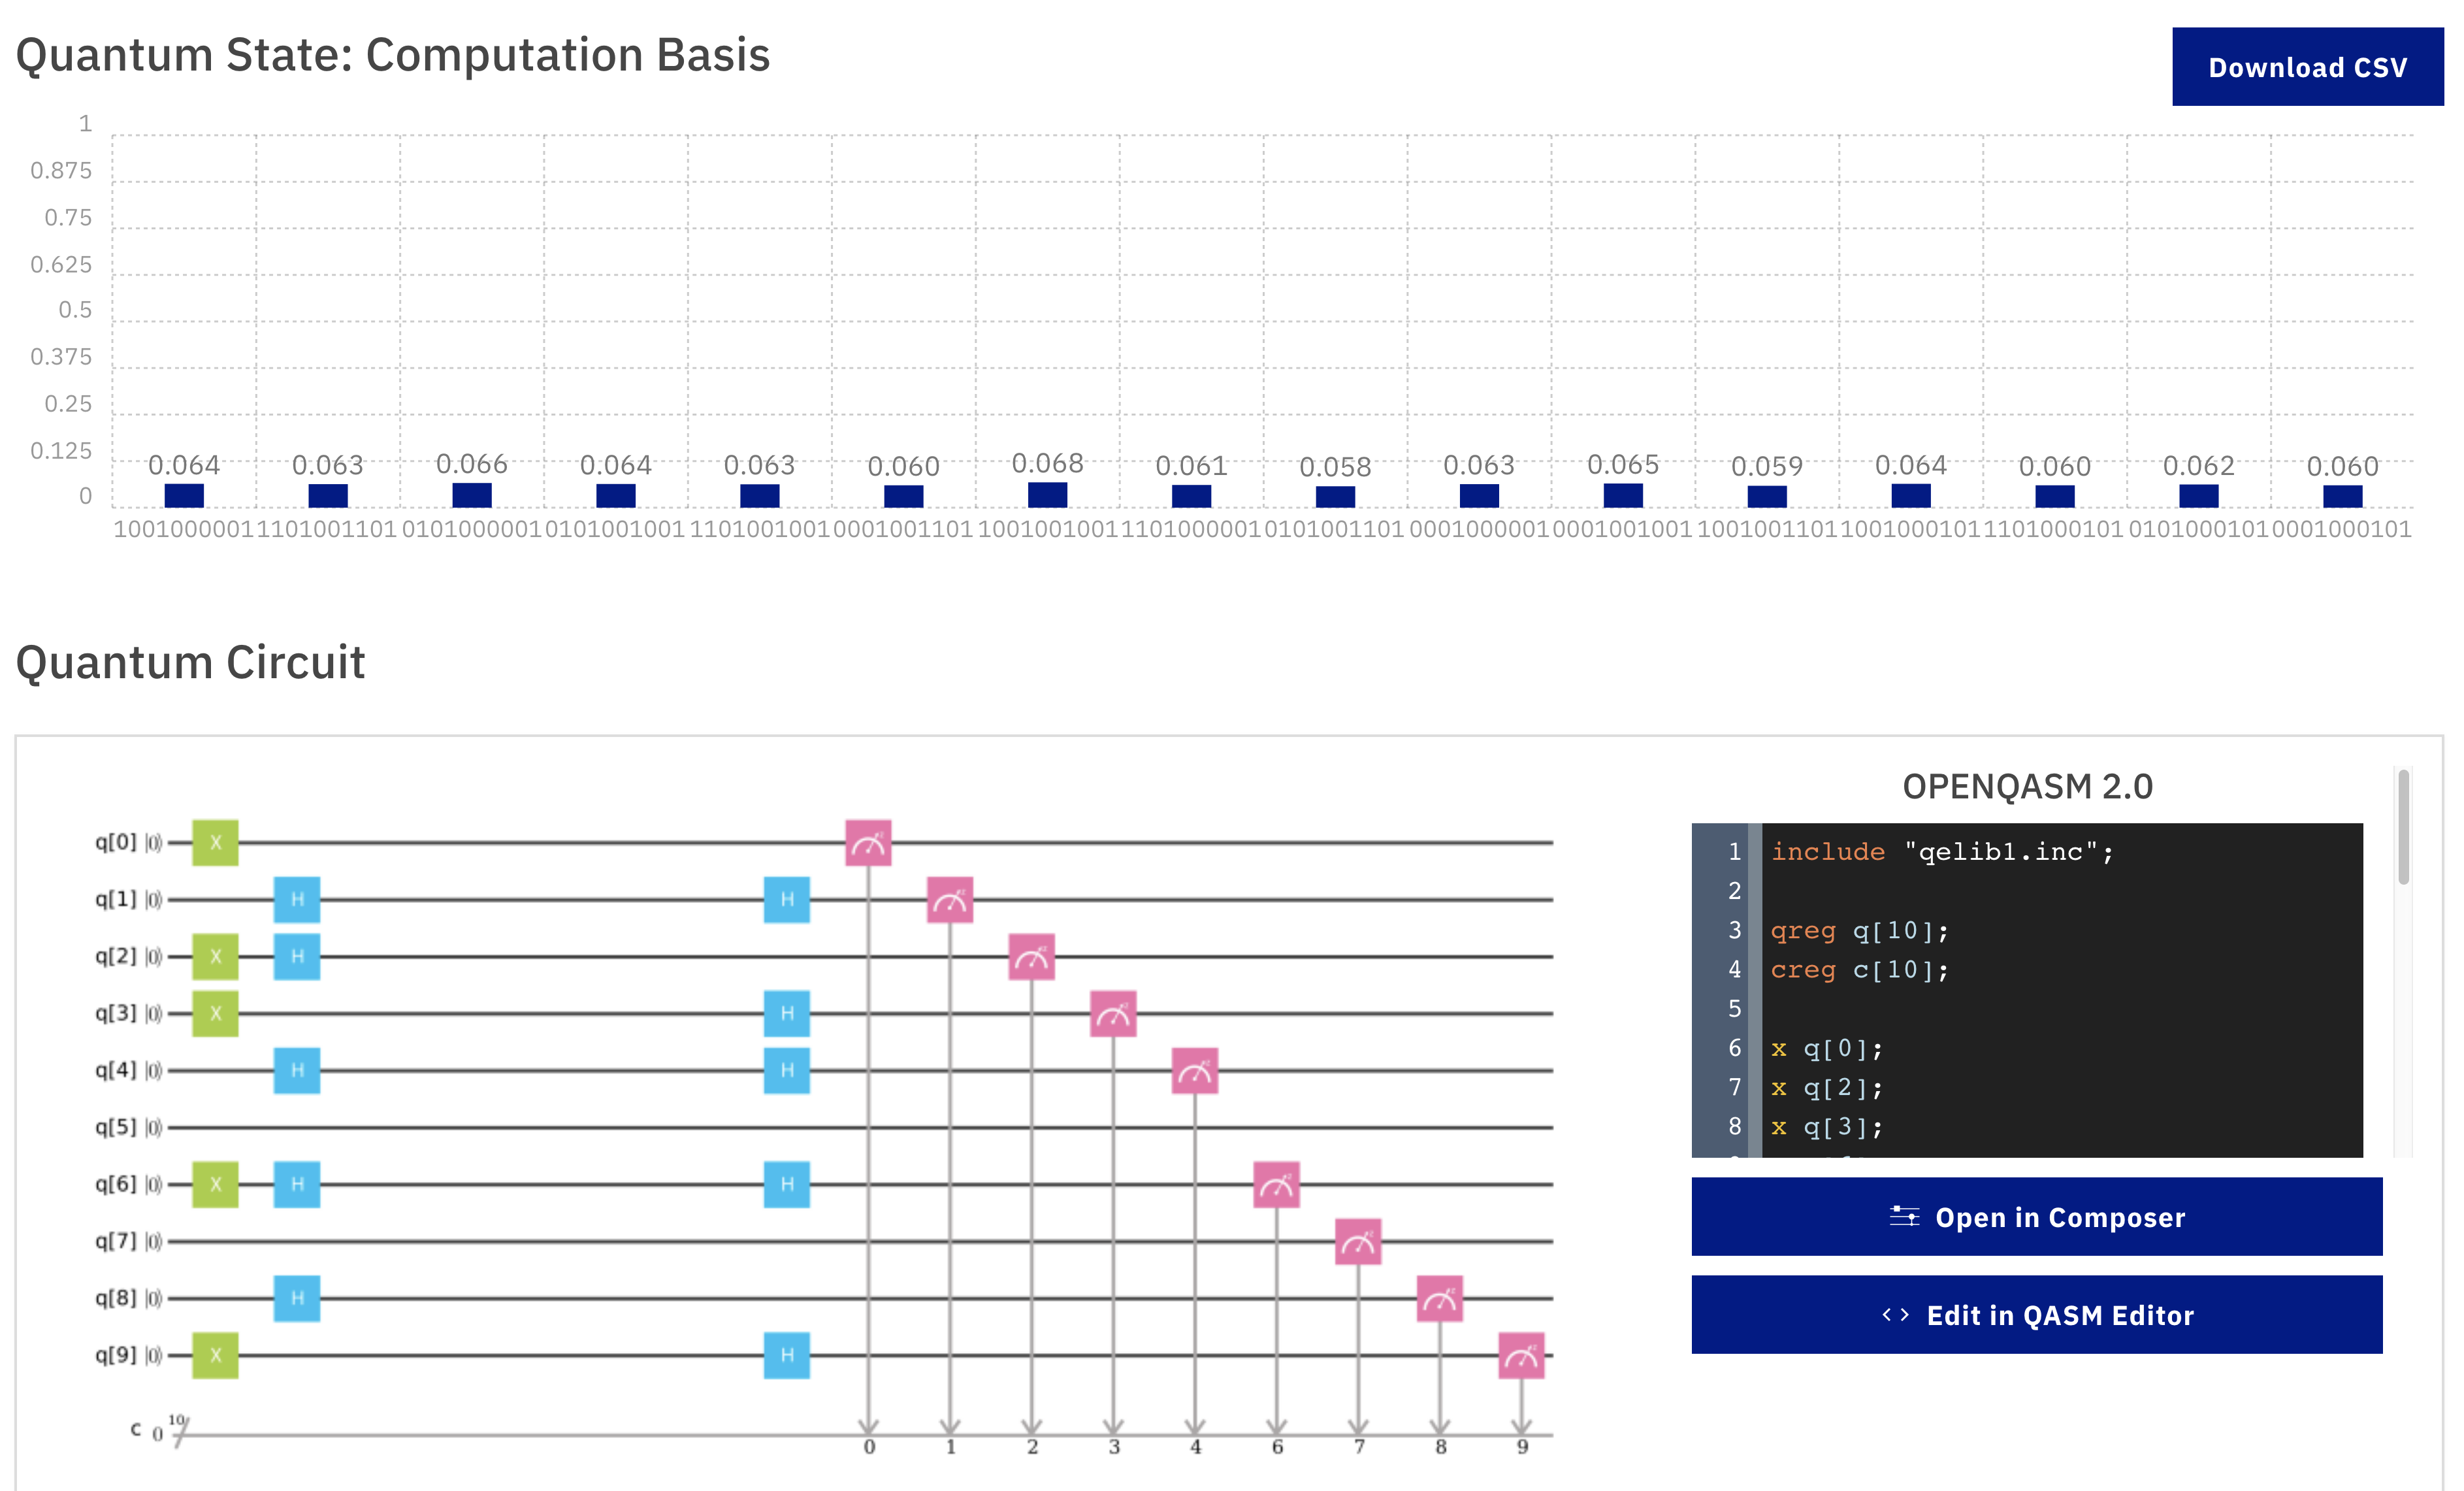

In [7]:
display.display(img6)

### 09.02.02: EPR Protocol

Figure 2 shows the circuit diagram and the result of simulation of EPR protocol. A combination of H and CNOT gates are used to create entangled qubits in the state $\frac{1}{\sqrt{2}}(\rvert00\rangle+\rvert11\rangle)$. Alice randomly measures the first qubit of the entangled pair in  standard or Hadamard basis. In order to measure in the Hadamard basis, like before, Alice applies the H gate before measurement. Similarly Bob measures the second qubit from every EPR pair in the standard or Hadamard basis. Execution results are shown for 8192 shots (maximum number of shots) and match the expected output. The results are stored in two classical registers of 10 bits each called abits and bbits for Alice's and Bob's bits respectively. Now Alice and Bob can execute the remaining classical steps of the protocol.

**Figure 2. Illustration of QKD protocol using EPR pairs. Simulation is shown for 20 qubits or 10 EPR pairs.**

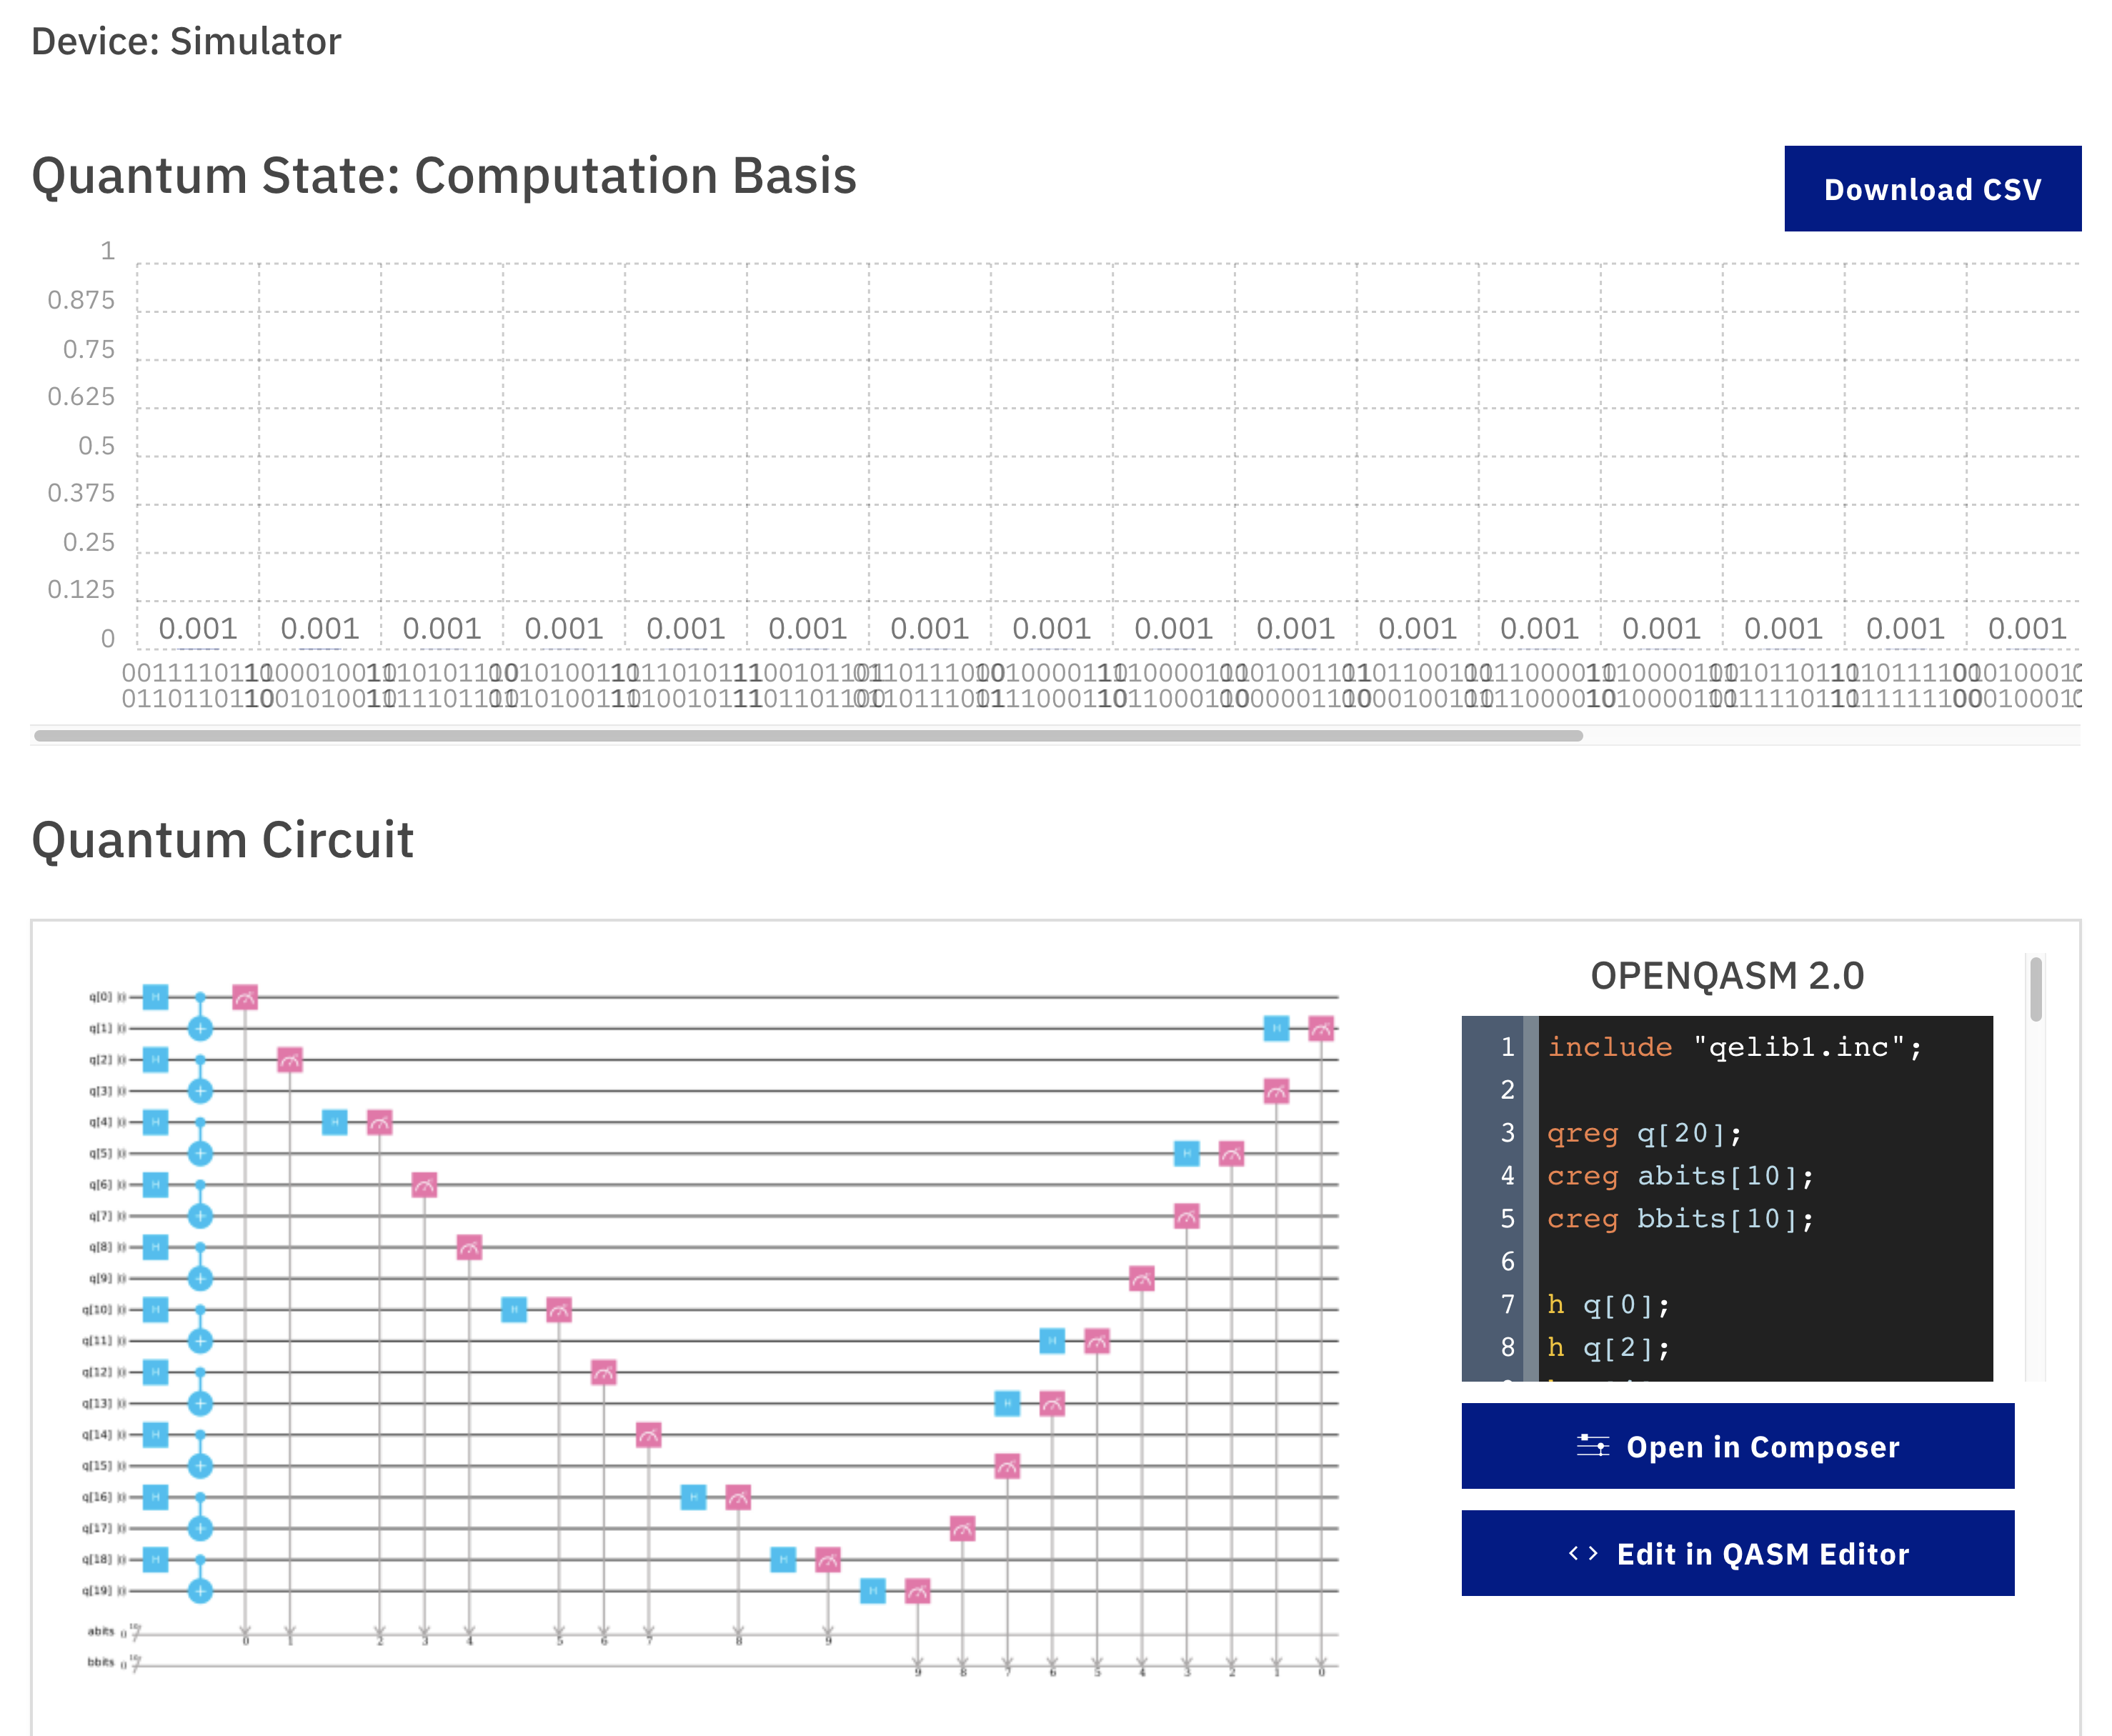

In [8]:
display.display(img7)

### 09.02.03: Three-Stage QKD Protocol

The three-stage QKD protocol is unique in the sense that it requires the back and forth transmission of qubits before a measurement is made in the end. We will continue to use our linear model for simulation and show Alice and Bob on the same circuit line repeated in order to simulate the back and forth communication.

Figure 3 shows one possible instance of the three-stage protocol. In the figure only two rotations are used by Alice and Bob, namely the identity rotation shown by id gate and the Hadamard rotation shown by H gate. These gates commute with each other and therefore satify the requirement of $U_aU_b=U_bU_a$. The two orthogonal states agreed upon by Alice and Bob are $\rvert0\rangle$ and $\rvert1\rangle$. Alice applies a X gate in order to convert the default qubit $\rvert0\rangle$ into $\rvert1\rangle$ before transmission.

Recall that the classical bit values written on $x$-axis, of the bar graph, as labels are to be read from right to left. Therefore, Alice sends $\rvert0\rangle\rvert0\rangle\rvert1\rangle\rvert0\rangle\rvert1\rangle\rvert0\rangle\rvert0\rangle\rvert0\rangle\rvert1\rangle\rvert1\rangle$ with qubit $q[0]$ written in the LSB position. Corresponding to this, Bob receives 0010100011 which is what we expected.

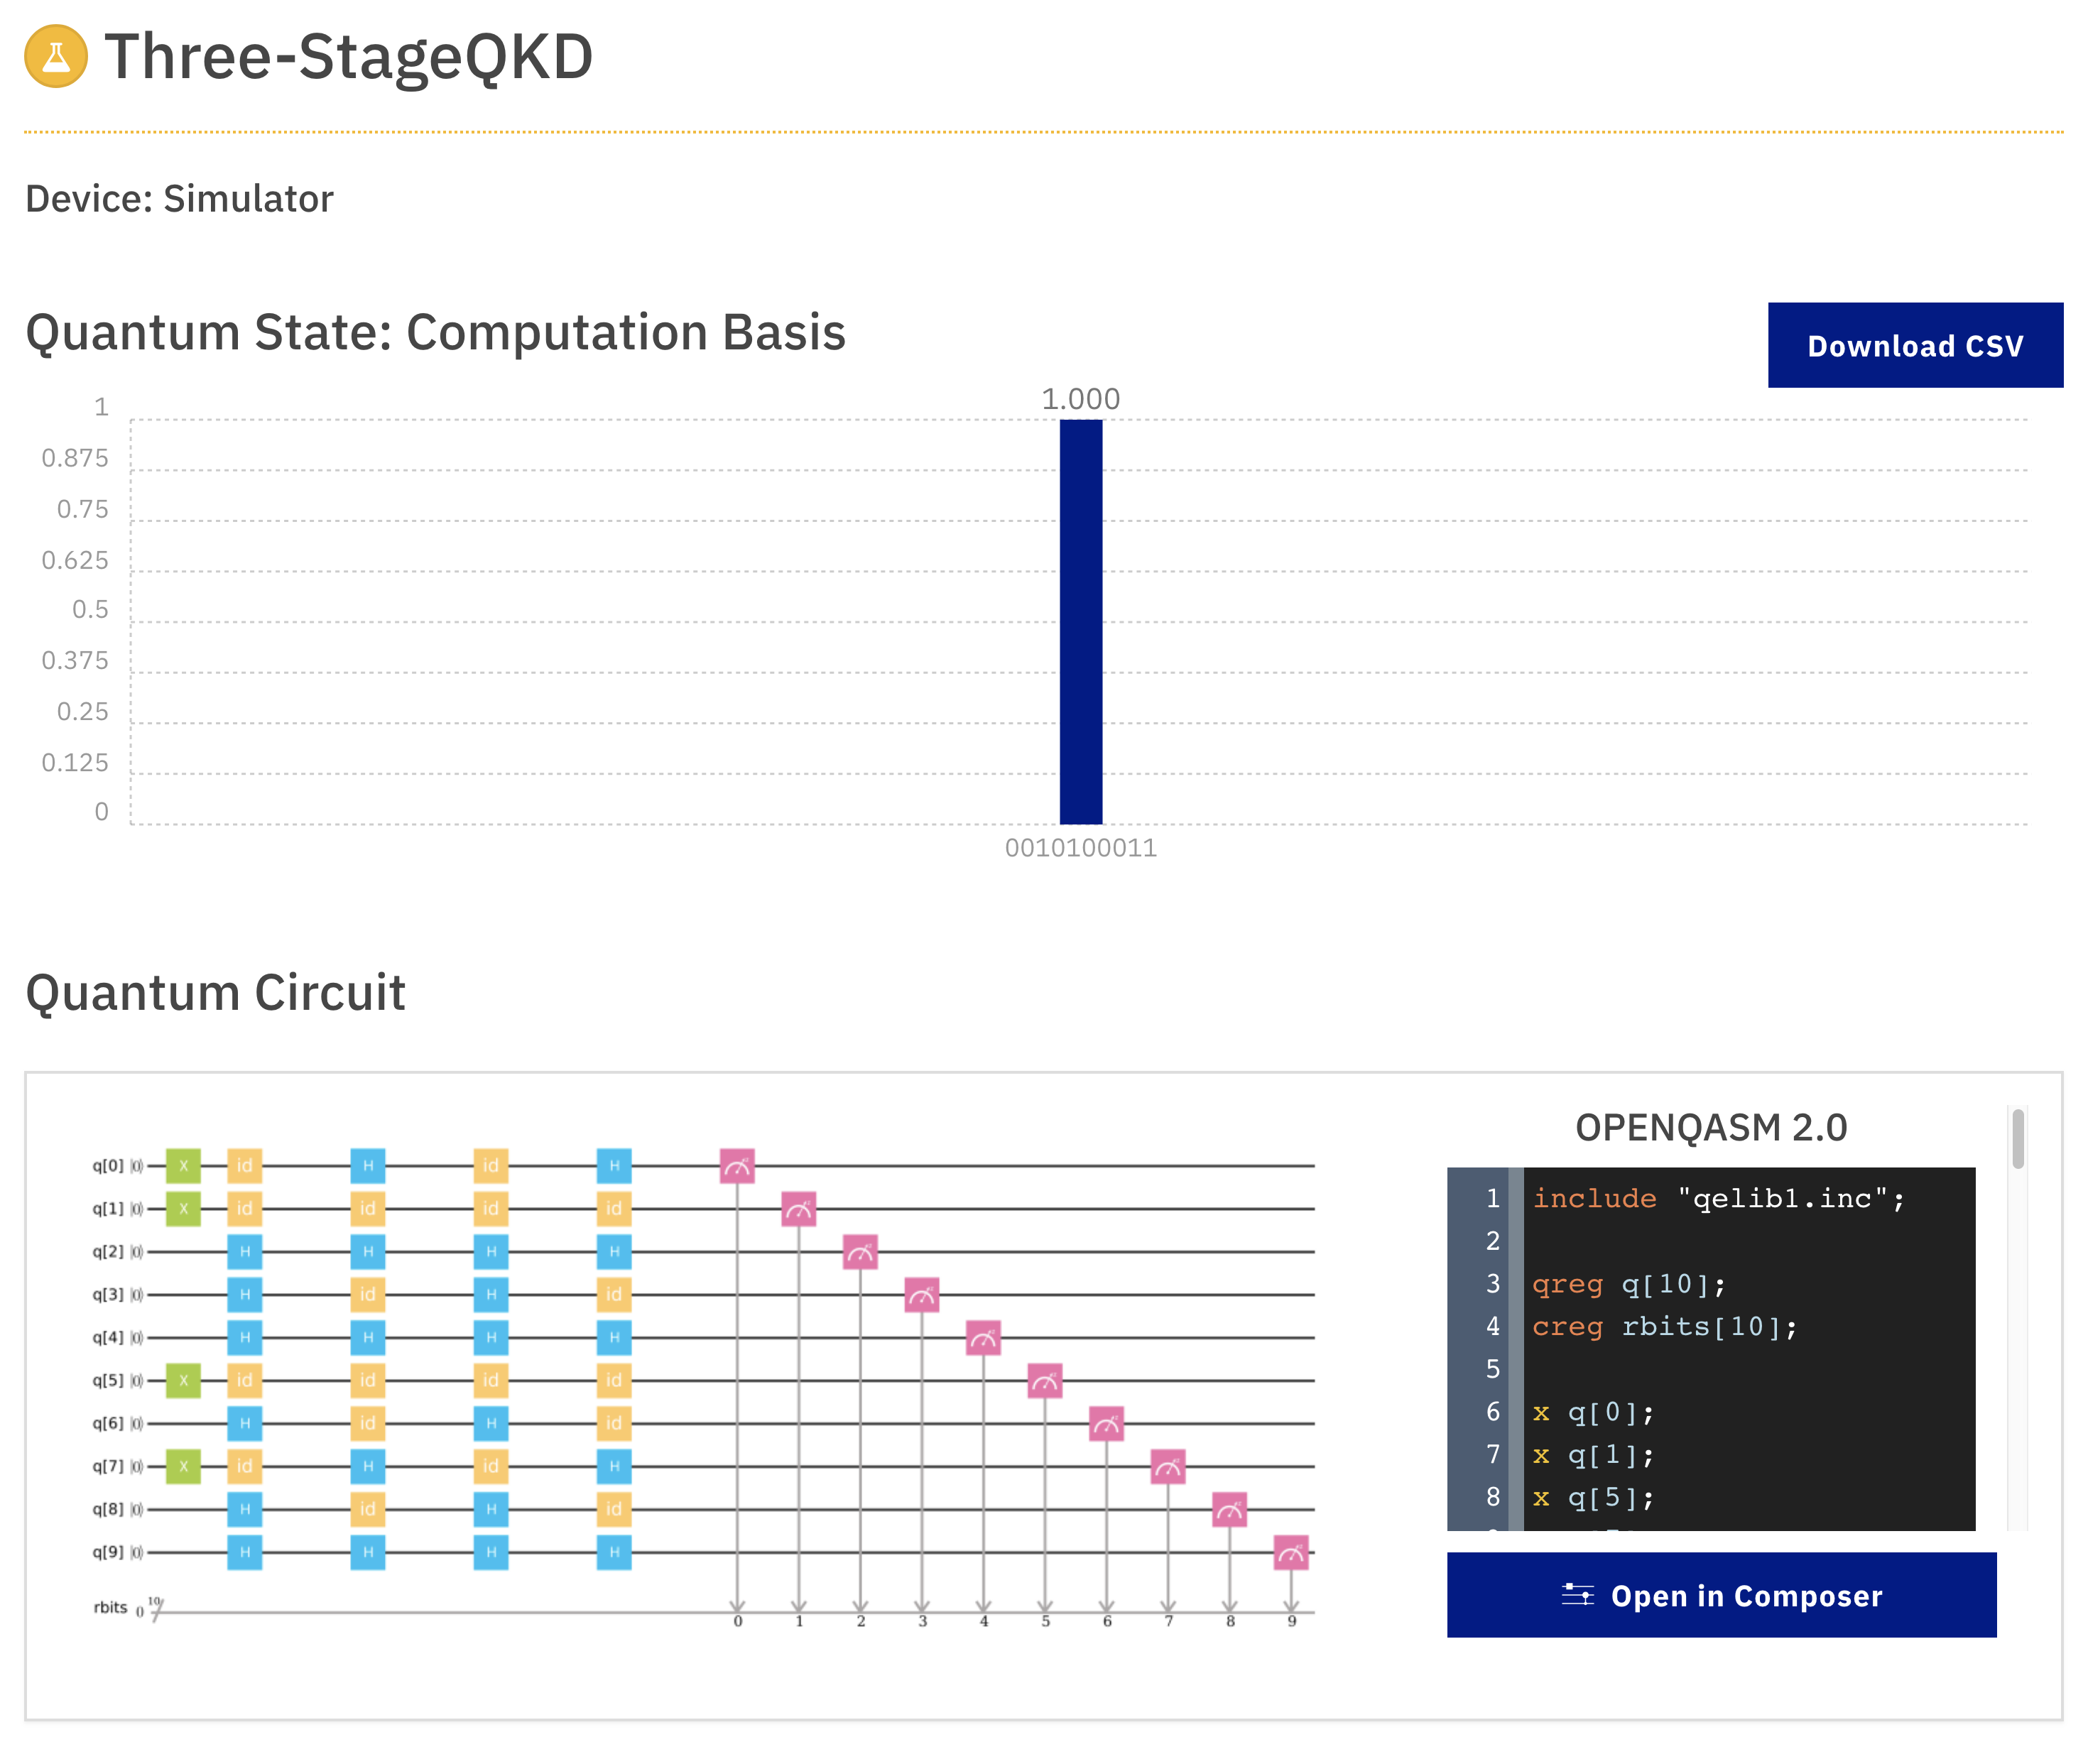

In [9]:
display.display(img8)